In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Read a CSV file into a DataFrame
csv_file_path = '../XRPUSDT_Dataset/XRP_dataset.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0      open_time     open     high      low    close    volume  \
0           0  1567296300000  0.25808  0.25821  0.25778  0.25787   66709.6   
1           1  1567296600000  0.25787  0.25789  0.25744  0.25751   76896.3   
2           2  1567296900000  0.25751  0.25793  0.25745  0.25774   71280.3   
3           3  1567297200000  0.25778  0.25788  0.25757  0.25781   45598.6   
4           4  1567297500000  0.25781  0.25804  0.25753  0.25804  114789.9   

      close_time  
0  1567296599999  
1  1567296899999  
2  1567297199999  
3  1567297499999  
4  1567297799999  


In [67]:
df = df.drop(columns=['Unnamed: 0'])
df = df[0:500]
print(df.head())

       open_time     open     high      low    close    volume     close_time
0  1567296300000  0.25808  0.25821  0.25778  0.25787   66709.6  1567296599999
1  1567296600000  0.25787  0.25789  0.25744  0.25751   76896.3  1567296899999
2  1567296900000  0.25751  0.25793  0.25745  0.25774   71280.3  1567297199999
3  1567297200000  0.25778  0.25788  0.25757  0.25781   45598.6  1567297499999
4  1567297500000  0.25781  0.25804  0.25753  0.25804  114789.9  1567297799999


In [68]:
# Calculate the 12-period EMA
df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [69]:
print(df.head())

       open_time     open     high      low    close    volume     close_time  \
0  1567296300000  0.25808  0.25821  0.25778  0.25787   66709.6  1567296599999   
1  1567296600000  0.25787  0.25789  0.25744  0.25751   76896.3  1567296899999   
2  1567296900000  0.25751  0.25793  0.25745  0.25774   71280.3  1567297199999   
3  1567297200000  0.25778  0.25788  0.25757  0.25781   45598.6  1567297499999   
4  1567297500000  0.25781  0.25804  0.25753  0.25804  114789.9  1567297799999   

      EMA12     EMA26      MACD  Signal_Line  
0  0.257870  0.257870  0.000000     0.000000  
1  0.257815  0.257843 -0.000029    -0.000006  
2  0.257803  0.257836 -0.000033    -0.000011  
3  0.257804  0.257834 -0.000030    -0.000015  
4  0.257840  0.257849 -0.000009    -0.000014  


In [70]:
def checkCrossOver(macd, signal_line):

    if macd > signal_line:
        return 1  # Bullish crossover
    elif macd < signal_line:
        return -1  # Bearish crossover
    else:
        return 0  # No crossover

In [71]:
def intersection(EMA12, EMA26, line_intersection):
    if EMA12 < EMA26:
        return "ema26"
    elif EMA12 > EMA26:
        return "ema12"
    elif line_intersection == None:
        if EMA12 > EMA26:
            return "ema12"
        elif EMA12 < EMA26:
            return "ema26"

In [73]:
line_intersection = None
# Loop through the rows of the DataFrame
for index, row in df.iterrows():    

    # Add any additional logic here if needed
    #df['crossOver'] = checkCrossOver(row['MACD'], row['Signal_Line'])

    # Check intersections
    old_line_intersection = line_intersection
    line_intersection = intersection(row['EMA12'], row['EMA26'], line_intersection)


    if index == 0: df.at[index, 'intersection'] = False
    elif line_intersection == None or old_line_intersection == None:
        df.at[index, 'intersection'] = False
    else:
        df.at[index, 'intersection'] = line_intersection != old_line_intersection or line_intersection == None or old_line_intersection == None

    if line_intersection == None:
        line_intersection = old_line_intersection
    elif old_line_intersection == None:
        old_line_intersection = line_intersection

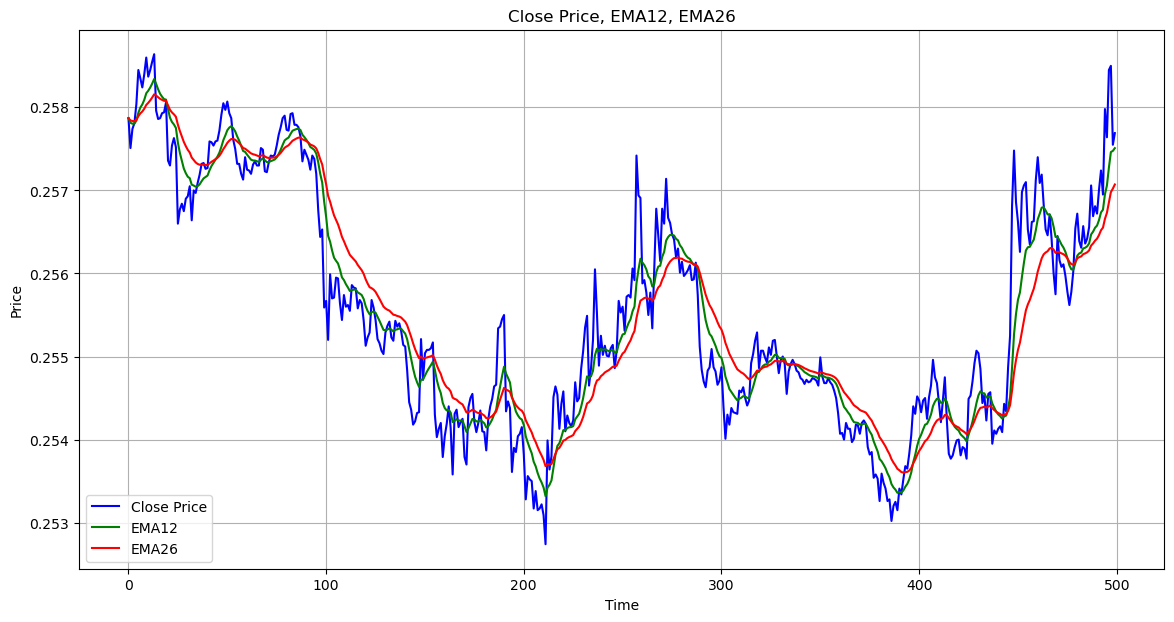

In [76]:
# Plot 'close', 'EMA12', and 'EMA26' columns as line graphs
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['EMA12'], label='EMA12', color='green')
plt.plot(df['EMA26'], label='EMA26', color='red')

# Add title, labels, and legend
plt.title('Close Price, EMA12, EMA26')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

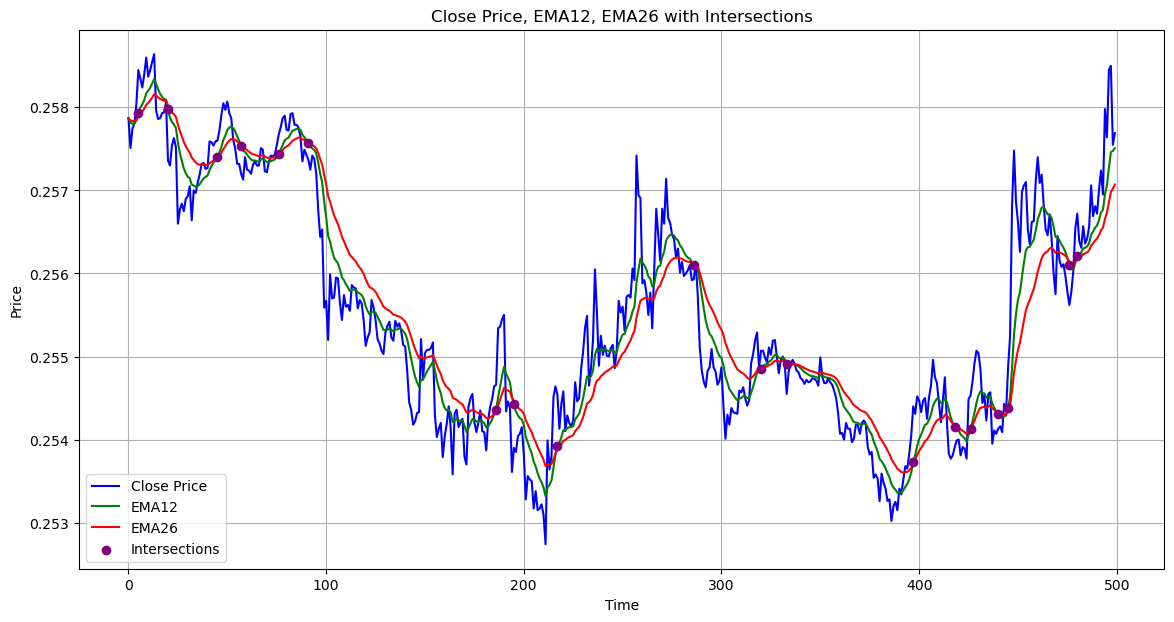

In [75]:
# Plot 'close', 'EMA12', and 'EMA26' columns as line graphs
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['EMA12'], label='EMA12', color='green')
plt.plot(df['EMA26'], label='EMA26', color='red')

# Add circles at the points where 'intersection' column is 1
intersection_points = df[df['intersection'] == 1]
plt.scatter(intersection_points.index, intersection_points['EMA12'], color='purple', label='Intersections', zorder=5)

# Add title, labels, and legend
plt.title('Close Price, EMA12, EMA26 with Intersections')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
